In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pyflux as pf
fig = plt.figure(figsize=(20,15))
pd.set_option("display.max_columns",100)
pd.get_option("display.max_columns")
from pytrends.request import TrendReq
import itertools
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

<Figure size 1440x1080 with 0 Axes>

In [212]:
pytrends = TrendReq(hl='en-US', tz=360)

In [213]:
df = pd.read_excel('dash_package/BLS_SA_Unemployment.xlsx',header=3)

In [214]:
ts_df = df.transpose()
df_UE = ts_df.iloc[1:]
df_UE.columns = ["seasonally_adjusted_unemployment_rate"]
date_rng = pd.date_range(start='1/1/1948', end='12/31/2018', freq='MS')
df_UE.index = date_rng
df_UE.head()

,seasonally_adjusted_unemployment_rate
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4
1948-04-01,3.9
1948-05-01,3.5


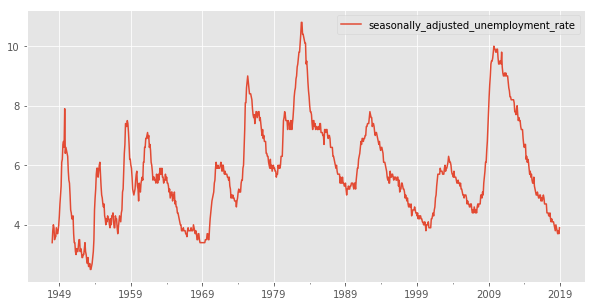

In [215]:
df_UE.plot(figsize=[10,5])

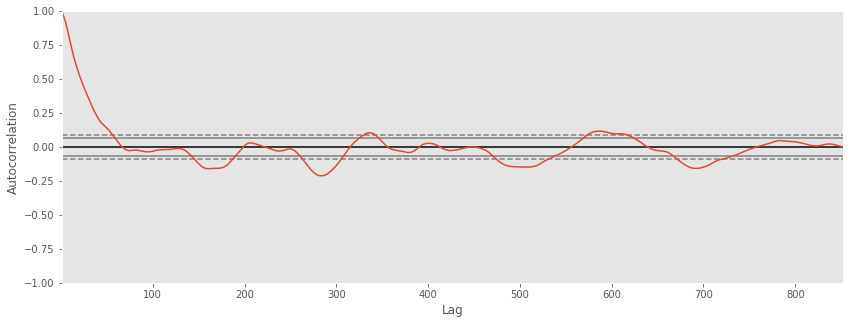

In [216]:
pd.plotting.autocorrelation_plot(df_UE)
# Autocorrelation = Matching our feature and time; How closely is the information given by time equal to the target feature
# Shows there is a high level of positive correlation between recent periods, but decays over time the correlation tends to center around the 0 mean
# Might need to consider adding additional normalization

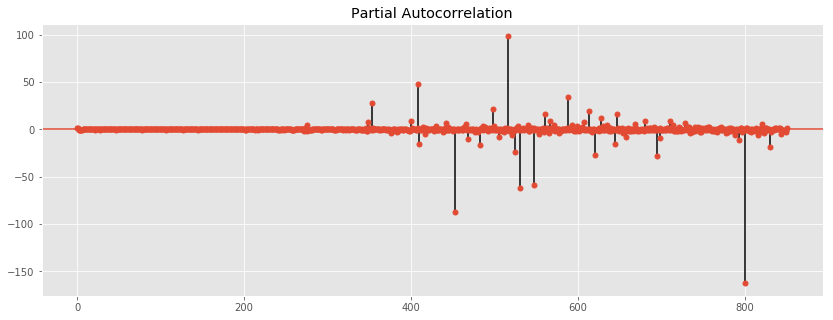

In [217]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(df_UE);

In [218]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [219]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries,window=12):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean - {}'.format(str(window)))
    std = plt.plot(rolstd, color='black', label = 'Rolling Std - {}'.format(str(window)))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

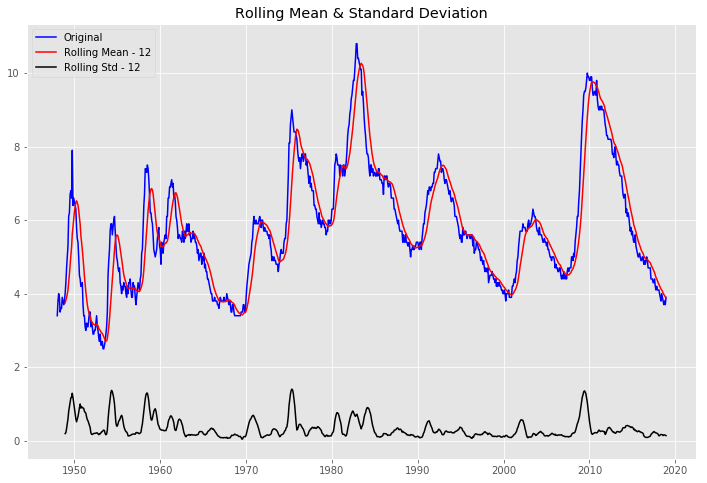

Results of Dickey-Fuller Test:
Test Statistic                  -3.047236
p-value                          0.030712
#Lags Used                      12.000000
Number of Observations Used    839.000000
Critical Value (1%)             -3.438168
Critical Value (5%)             -2.864991
Critical Value (10%)            -2.568608
dtype: float64


In [220]:
test_stationarity(df_UE.seasonally_adjusted_unemployment_rate)

In [221]:
# Difference formula

def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [222]:
# First difference DF test return a p-value of .094; not good enough
df_UE_first = difference(df_UE.seasonally_adjusted_unemployment_rate)

In [223]:
# Will remove the rolling average as a naive attempt to reduce noise, but keep tendencies of the data

def use_rol_mean(pd_series, window=12):
    rolmean = pd_series.rolling(window).mean()
    data_minus_rolmean = pd_series - rolmean
    # Adding in rolmean creates NaNs for first year
    data_minus_rolmean.dropna(inplace=True)

    # Plot rollingmean
    fig = plt.figure(figsize=(11,7))
    orig = plt.plot(pd_series, color='blue',label='Original')
    plt.plot(data_minus_rolmean, color='red',label='Rolling mean - {}'.format(str(window)))
    plt.legend(loc='best')
    plt.title('Rolling means are subtracted from Original')
    plt.show(block=False)
    return data_minus_rolmean

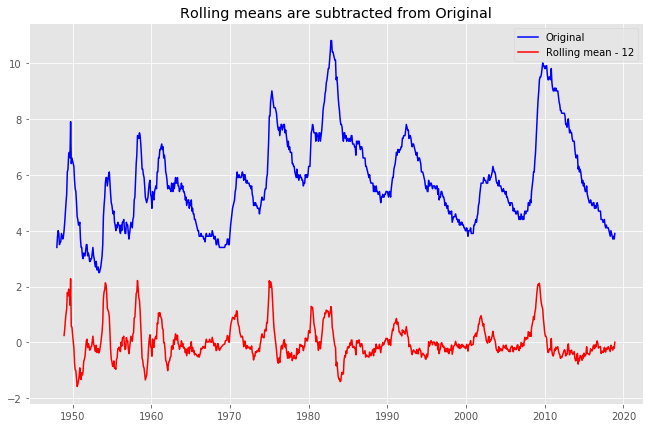

In [224]:
df_UE_rol_mean = use_rol_mean(df_UE,12)

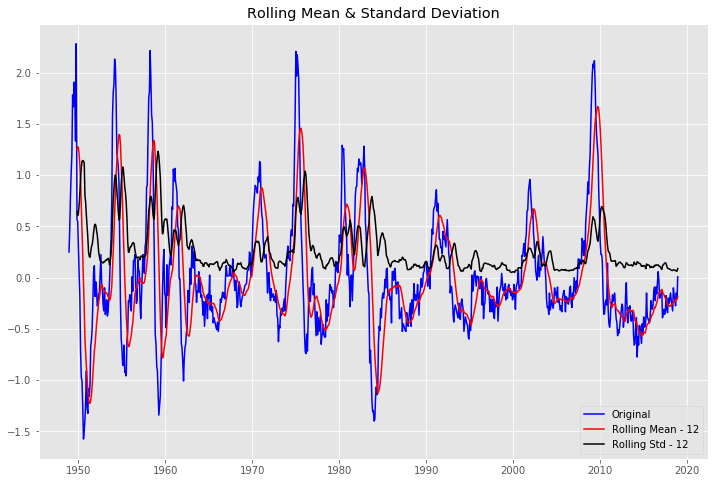

Results of Dickey-Fuller Test:
Test Statistic                -6.209328e+00
p-value                        5.557146e-08
#Lags Used                     1.500000e+01
Number of Observations Used    8.250000e+02
Critical Value (1%)           -3.438301e+00
Critical Value (5%)           -2.865050e+00
Critical Value (10%)          -2.568639e+00
dtype: float64


In [225]:
# Very Low p-value; 12 month lag
test_stationarity(df_UE_rol_mean.seasonally_adjusted_unemployment_rate)

In [226]:
df_UE_rol_mean['seasonally_adjusted_unemployment_rate'] = pd.to_numeric(df_UE_rol_mean.seasonally_adjusted_unemployment_rate,downcast='float')

In [227]:
df_UE_rol_mean = df_UE_rol_mean['2005-01-01':]

In [296]:
list(df_UE_rol_mean.index.strftime("%Y/%m/%d"))

['2005/01/01',
 '2005/02/01',
 '2005/03/01',
 '2005/04/01',
 '2005/05/01',
 '2005/06/01',
 '2005/07/01',
 '2005/08/01',
 '2005/09/01',
 '2005/10/01',
 '2005/11/01',
 '2005/12/01',
 '2006/01/01',
 '2006/02/01',
 '2006/03/01',
 '2006/04/01',
 '2006/05/01',
 '2006/06/01',
 '2006/07/01',
 '2006/08/01',
 '2006/09/01',
 '2006/10/01',
 '2006/11/01',
 '2006/12/01',
 '2007/01/01',
 '2007/02/01',
 '2007/03/01',
 '2007/04/01',
 '2007/05/01',
 '2007/06/01',
 '2007/07/01',
 '2007/08/01',
 '2007/09/01',
 '2007/10/01',
 '2007/11/01',
 '2007/12/01',
 '2008/01/01',
 '2008/02/01',
 '2008/03/01',
 '2008/04/01',
 '2008/05/01',
 '2008/06/01',
 '2008/07/01',
 '2008/08/01',
 '2008/09/01',
 '2008/10/01',
 '2008/11/01',
 '2008/12/01',
 '2009/01/01',
 '2009/02/01',
 '2009/03/01',
 '2009/04/01',
 '2009/05/01',
 '2009/06/01',
 '2009/07/01',
 '2009/08/01',
 '2009/09/01',
 '2009/10/01',
 '2009/11/01',
 '2009/12/01',
 '2010/01/01',
 '2010/02/01',
 '2010/03/01',
 '2010/04/01',
 '2010/05/01',
 '2010/06/01',
 '2010/07/

In [293]:
np.array(df_UE_rol_mean.iloc[:,0:1]).flatten().tolist()

[-0.2083333283662796,
 -0.09166666865348816,
 -0.24166665971279144,
 -0.2083333283662796,
 -0.2666666805744171,
 -0.3166666626930237,
 -0.2750000059604645,
 -0.3333333432674408,
 -0.20000000298023224,
 -0.15833333134651184,
 -0.125,
 -0.18333333730697632,
 -0.3333333432674408,
 -0.18333333730697632,
 -0.24166665971279144,
 -0.20000000298023224,
 -0.25833332538604736,
 -0.22499999403953552,
 -0.10000000149011612,
 -0.0833333358168602,
 -0.24166665971279144,
 -0.2916666567325592,
 -0.15000000596046448,
 -0.2083333283662796,
 -2.6645352591003757e-15,
 -0.07500000298023224,
 -0.15000000596046448,
 -0.03333333507180214,
 -0.11666666716337204,
 0.0833333358168602,
 0.18333333730697632,
 0.09166666865348816,
 0.17499999701976776,
 0.15000000596046448,
 0.13333334028720856,
 0.38333332538604736,
 0.3499999940395355,
 0.21666666865348816,
 0.3583333194255829,
 0.21666666865348816,
 0.5333333611488342,
 0.6499999761581421,
 0.7583333253860474,
 0.9333333373069763,
 0.8166666626930237,
 1.0666667

In [294]:
df_UE_rol_mean.head()

,seasonally_adjusted_unemployment_rate
2005-01-01,-0.208333
2005-02-01,-0.091667
2005-03-01,-0.241667
2005-04-01,-0.208333
2005-05-01,-0.266667


In [350]:
# Import job data
kw_list = ['job']
pytrends.build_payload(kw_list, cat=0, timeframe='2004-11-01 2018-12-31', geo='US', gprop='')
df_job_raw = pytrends.interest_over_time().drop("isPartial",axis=1)

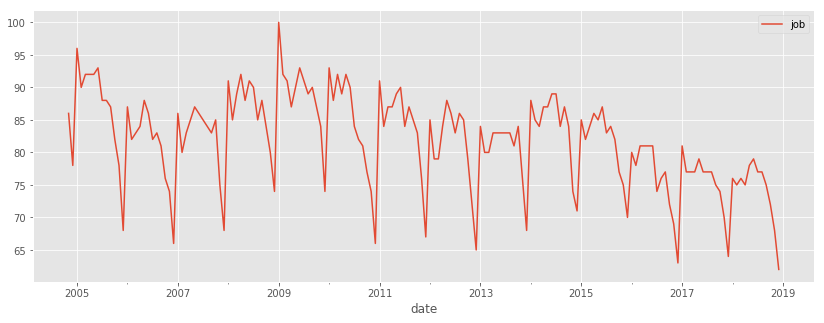

In [351]:
df_job_raw.plot()

In [352]:
df_job = df_job_raw

In [353]:
df_job_raw.head()

,job
date,
2004-11-01,86
2004-12-01,78
2005-01-01,96
2005-02-01,90
2005-03-01,92


In [354]:
def raw_to_percent(data):
    columns = [100 * (b - a) / a for a, b in zip(list(df_job.job.values)[:-1], list(df_job.job.values)[1:])]
    return [0] + columns

In [355]:
# Create percent change column and shift to pq job search data
df_job['job_search_change_raw'] = raw_to_percent(df_job)
df_job['job_search_change (prv_mon)'] = df_job['job_search_change_raw'].shift(1)

# remove two rows and first/last column
df_job = df_job.iloc[2:,2:]

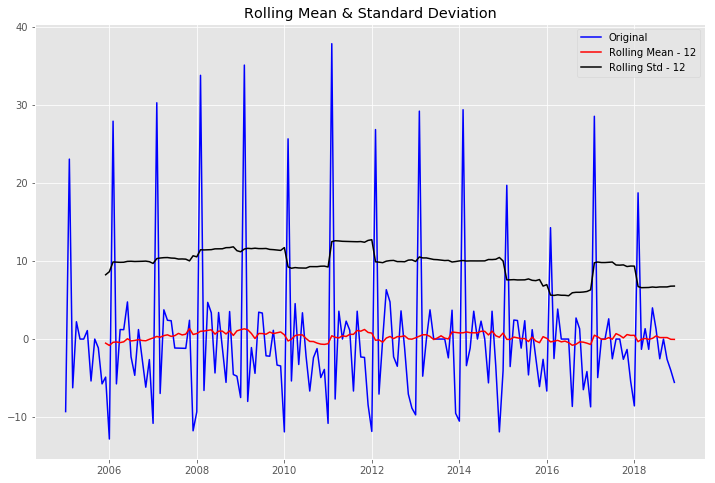

Results of Dickey-Fuller Test:
Test Statistic                  -3.040742
p-value                          0.031261
#Lags Used                      13.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


In [356]:
test_stationarity(df_job['job_search_change (prv_mon)'])

In [357]:
# df_job_rol_mean = use_rol_mean(df_job,12)

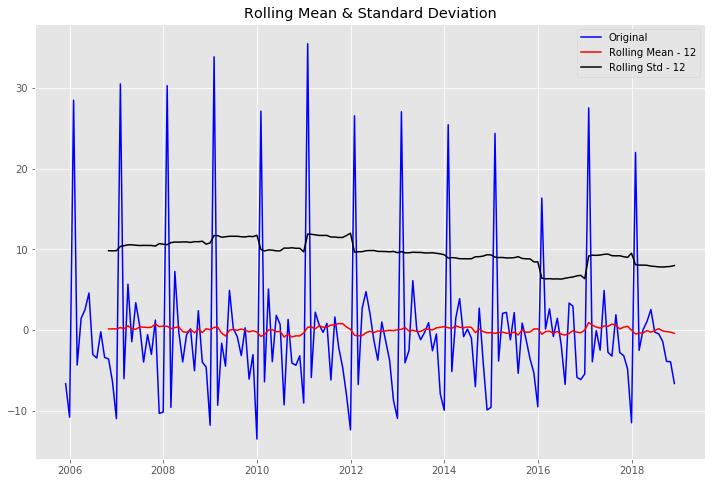

Results of Dickey-Fuller Test:
Test Statistic                  -4.715515
p-value                          0.000079
#Lags Used                      11.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


In [358]:
test_stationarity(df_job_rol_mean['job_search_change (prv_mon)'])

In [359]:
def arima_modeler(data,pdq_lower,pdq_upper,m):
    p = d = q = range(pdq_lower, pdq_upper)
    pdq = list(itertools.product(p, d, q))
    pdqs = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(data,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                print('except')
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df.loc[ans_df['aic'].idxmin()]
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data,
                                order=ans_df.loc[ans_df['aic'].idxmin()][0],
                                seasonal_order=ans_df.loc[ans_df['aic'].idxmin()][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    output = ARIMA_MODEL.fit()
    print(output.summary().tables[1])
    return output

In [360]:
job_model = arima_modeler(df_job,0,3,12)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3730      0.102     -3.642      0.000      -0.574      -0.172
ar.L2         -0.2589      0.102     -2.529      0.011      -0.460      -0.058
ma.L1         -2.0404      0.602     -3.392      0.001      -3.220      -0.861
ma.L2          1.0416      0.634      1.643      0.100      -0.201       2.284
ma.S.L12      -1.9469      6.215     -0.313      0.754     -14.127      10.234
ma.S.L24       0.9800      6.117      0.160      0.873     -11.010      12.970
sigma2         8.2641     52.943      0.156      0.876     -95.502     112.030


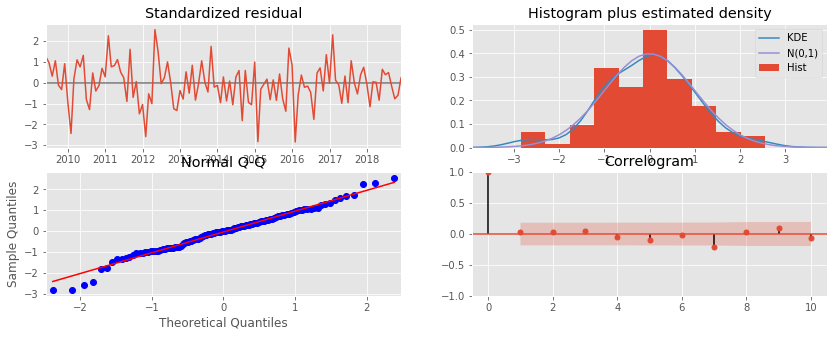

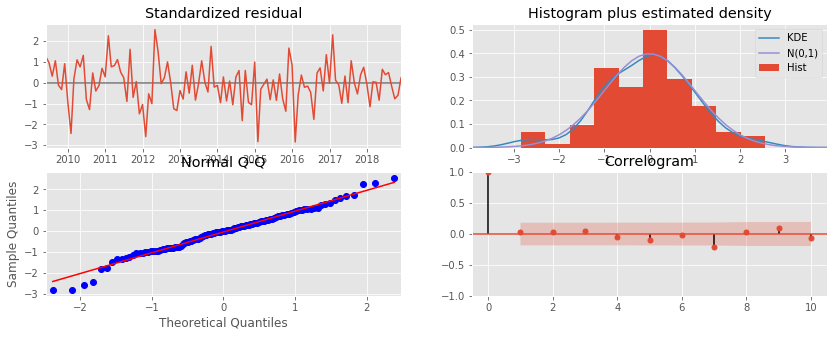

In [361]:
job_model.plot_diagnostics()

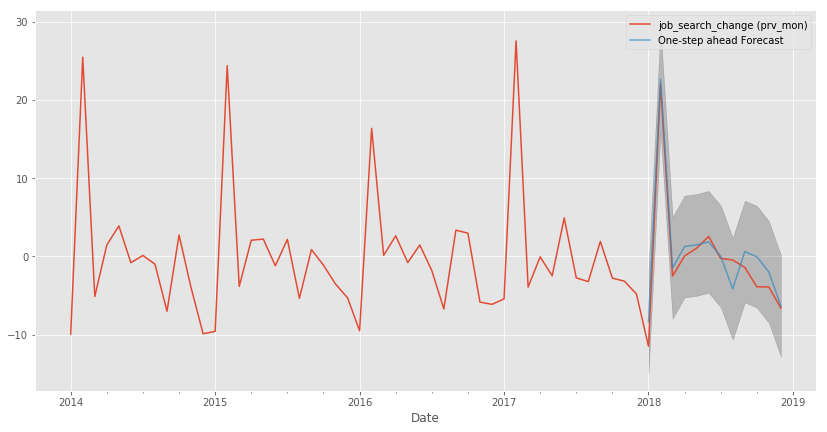

In [362]:

pred = job_model.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_job_rol_mean['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
#     ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [363]:
def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [364]:
# Determine MSE/RMSE

y_forecasted = np.array(pred.predicted_mean)
y_truth = np.array(df_job['2018-01-01':])
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 5)))
print('The Mean Average Percent Error is {}'.format(round(mean_absolute_percentage_error(y_forecasted,y_truth), 5)))

The Mean Squared Error of our forecasts is 96.8146
The Root Mean Squared Error of our forecasts is 9.83944
The Mean Average Percent Error is inf


In [238]:
# Combine dataframes
df_ue_js = df_UE_rol_mean.join(df_job)

In [239]:
df_ue_js.columns = ['unempl_rate (12mn RA)','prev_mon_job_search_rate']

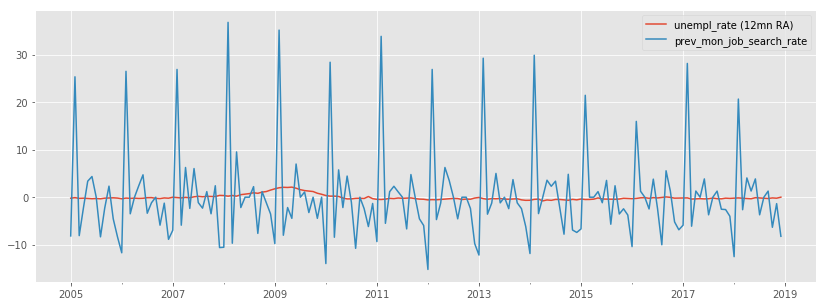

In [349]:
df_ue_js.plot()

In [322]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

training_range_end = '2017-12-31'
testing_range_start = '2018-01-01'
testing_range_end = '2018-12-31'

ts_train = df_ue_js.loc[:training_range_end,df_ue_js.columns[0]]
ts_test = df_ue_js.loc[testing_range_start:,df_ue_js.columns[0]].values
ex_train = df_ue_js.loc[:training_range_end,df_ue_js.columns[1]].values
ex_test = df_ue_js.loc[testing_range_start:,df_ue_js.columns[1]].values

data1 = ts_train.values
exog1 = ex_train

In [323]:
## Find best p,d,q parameters

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Find best order/seasonal_order params
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(data1,
                                            exog=exog1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

            
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =282.5161502183995
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =249.3005492352545
ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =240.2617893413921
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =298.05100114470326
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =277.86899345347797
ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =246.80917593578545
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =395.35539142417
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =292.39672521871574
ARIMA (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =265.79809056635685
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =249.68125147633037
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =248.62242431770832
ARIMA (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =240.99391854815212
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =283.95149258686774
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =269.69177088784267
ARIMA (0, 0,

ARIMA (0, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =-26.140475824787664
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =-141.79950828734738
ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =-150.4833807230345
ARIMA (0, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =-135.2082089187411
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =-42.24949634105473
ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =-87.39927156696358
ARIMA (0, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =-82.375222473205
ARIMA (0, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =62.36119418122931
ARIMA (0, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =5.0038220312992125
ARIMA (0, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =-16.24666722526713
ARIMA (0, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =-128.69551976290023
ARIMA (0, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =-138.21801562770236
ARIMA (0, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =-133.2393885320526
ARIMA (0, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =-40.906213690201206
ARIM

ARIMA (0, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =8.898632838488158
ARIMA (0, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =-12.194368624008948
ARIMA (0, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =-121.80792395441725
ARIMA (0, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =-132.1050213183925
ARIMA (0, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =-126.43303756060658
ARIMA (0, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =-33.533161118089836
ARIMA (0, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =-70.20827482670619
ARIMA (0, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =-77.87974757795077
ARIMA (0, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =49.54595790062111
ARIMA (0, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =11.527389296839221
ARIMA (0, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =0.2177739972216628
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =-158.44463792023643
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =-134.77558301758572
ARIMA (1, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =-141.18291736228343
A

ARIMA (1, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =42.381581583236326
ARIMA (1, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =2.7476616313747826
ARIMA (1, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =1.6336941549770678
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =-154.1588976921271
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =-150.59713186246833
ARIMA (1, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =-136.92692468303426
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =-9.30285148867273
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =-90.56536889447277
ARIMA (1, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =-82.77033882060755
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =141.14663892787607
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =29.63060712810721
ARIMA (1, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =-26.449637970686133
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =-140.36517591111996
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =-151.8793880098691
ARIM

ARIMA (1, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =-76.3949791677893
ARIMA (1, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =146.5493837890452
ARIMA (1, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =35.61781828111302
ARIMA (1, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =-19.3091056211805
ARIMA (1, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =-133.7993702127086
ARIMA (1, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =-141.27006266258212
ARIMA (1, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =-126.75495881682417
ARIMA (1, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =-33.51516804564376
ARIMA (1, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =-78.8882867970667
ARIMA (1, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =-77.49192775806064
ARIMA (1, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =70.03638484405334
ARIMA (1, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =10.50642256844773
ARIMA (1, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =-10.771178993812146
ARIMA (1, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =-118.28299869924416
ARIMA (1,

ARIMA (2, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =-88.18253463415432
ARIMA (2, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =-82.23053930310152
ARIMA (2, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =61.739477271194495
ARIMA (2, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =3.87644941356532
ARIMA (2, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =-17.598627354217207
ARIMA (2, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =-125.28962779913056
ARIMA (2, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =-132.37586020829536
ARIMA (2, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =-131.68098484969744
ARIMA (2, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =-41.856590417402366
ARIMA (2, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =-75.73760472645208
ARIMA (2, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =-79.99643654789794
ARIMA (2, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =42.86410516169304
ARIMA (2, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =2.061385543180876
ARIMA (2, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =3.5057836443742314
ARIMA

ARIMA (2, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =-35.73782767812963
ARIMA (2, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =-69.41821556152165
ARIMA (2, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =-67.11589900773582
ARIMA (2, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =49.60385691836593
ARIMA (2, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =11.145304483692975
ARIMA (2, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =13.570598740138959
ARIMA (2, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =-142.0432963145193
ARIMA (2, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =-138.28481551633723
ARIMA (2, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =-125.9624999350539
ARIMA (2, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =0.7917838798021037
ARIMA (2, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =-78.85012891008613
ARIMA (2, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =-73.92595468802207
ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =139.76663149411283
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =37.57381521084571
ARIMA (

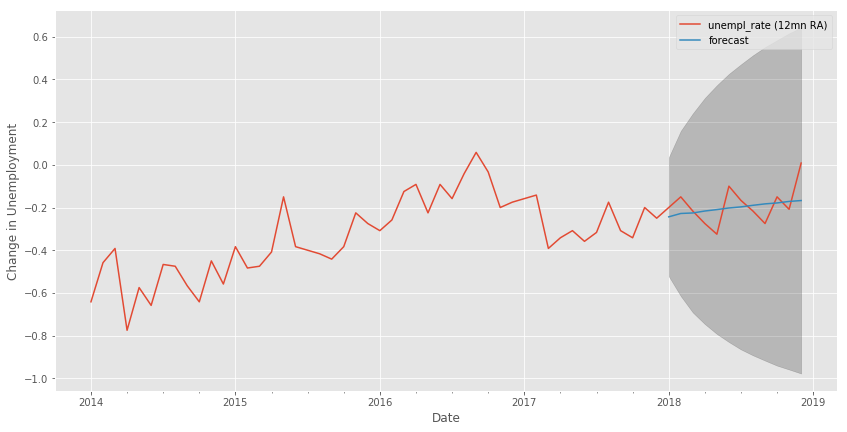

In [324]:
# fit model using order/seasonal_order with the lowest AIC scores from previous test
model = SARIMAX(data1, exog=exog1, order=ans_df.loc[ans_df['aic'].idxmin()][0], seasonal_order=ans_df.loc[ans_df['aic'].idxmin()][1])
model_fit = model.fit()

# make forecast
exog2 = ex_test.reshape(ex_test.shape[0],1)
yhat = model_fit.get_forecast(12,exog=exog2,dynamic=False)

# Graph forecast
yhat_df = pd.DataFrame(yhat.predicted_mean, index=pd.date_range(testing_range_start, periods=12, freq='MS'),columns=['forecast'])
yhat_df_ci = pd.DataFrame(yhat.conf_int(), index=pd.date_range(testing_range_start, periods=12, freq='MS'),columns=['ci_low','ci_high'])

fig, ax = plt.subplots()
ax = df_ue_js['unempl_rate (12mn RA)'].loc['2014':].plot(ax=ax)

yhat_df.plot(ax=ax, label='One-step ahead Forecast', figsize=(14, 7))
ax.fill_between(yhat_df_ci.index,
                yhat_df_ci.iloc[:, 0],
                yhat_df_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Change in Unemployment')
plt.legend()
plt.show()

In [328]:
# Determine MSE/RMSE

y_forecasted = yhat.predicted_mean
y_truth =  df_ue_js['unempl_rate (12mn RA)'].loc[testing_range_start:]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 5)))
print('The Mean Average Percent Error is {}'.format(round(mean_absolute_percentage_error(y_forecasted,y_truth), 5)))

The Mean Squared Error of our forecasts is 0.00653
The Root Mean Squared Error of our forecasts is 0.0808
The Mean Average Percent Error is 2.03735


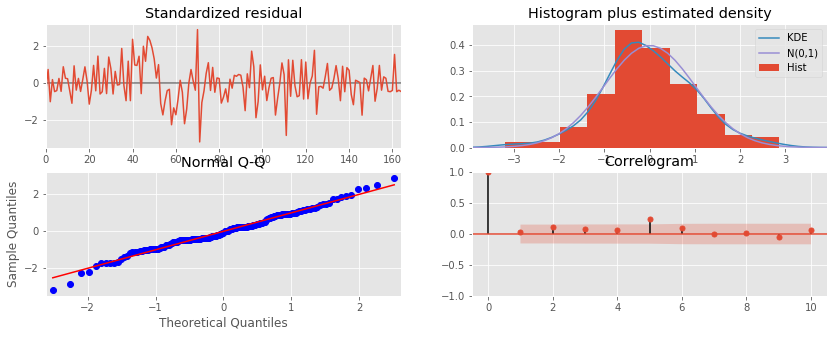

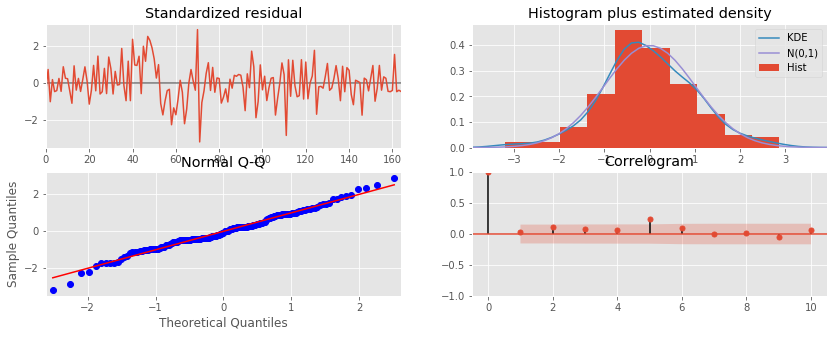

In [245]:
model_fit.plot_diagnostics()

In [246]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  165
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  89.326
Date:                Tue, 05 Feb 2019   AIC                           -172.652
Time:                        15:45:43   BIC                           -163.335
Sample:                             0   HQIC                          -168.870
                                - 165                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0003      0.001      0.430      0.667      -0.001       0.002
ar.L1          0.9663      0.015     66.068      0.000       0.938       0.995
sigma2         0.0195      0.002     10.145      0.000       0.016       0.023
===================================================================================
Ljung-Box (Q):                       64.07   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.01   Prob(JB):                         0.36
Heteroskedasticity (H):               0.69   Skew:                             0.00
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# OLD SECTION

In [ ]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
ans_df.loc[ans_df['aic'].idxmin()][0]

In [ ]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts_df_input,
                                order=ans_df.loc[ans_df['aic'].idxmin()][0],
                                seasonal_order=ans_df.loc[ans_df['aic'].idxmin()][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

In [ ]:
def arima_modeler(data,pdq_lower,pdq_upper,m):
    p = d = q = range(pdq_lower, pdq_upper)
    pdq = list(itertools.product(p, d, q))
    pdqs = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(data,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df.loc[ans_df['aic'].idxmin()]
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts_df_input,
                                order=ans_df.loc[ans_df['aic'].idxmin()][0],
                                seasonal_order=ans_df.loc[ans_df['aic'].idxmin()][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    output = ARIMA_MODEL.fit()
    print(output.summary().tables[1])
    return output

In [ ]:
arima_unemployment = arima_modeler(ts_df_input,0,2,12)

In [ ]:
arima_unemployment.plot_diagnostics()

In [ ]:
type(arima_unemployment)

In [ ]:
test_stationarity(ts_df_input)